###### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-bottom: 10px;">Machine Learning</p>
<div style="margin-left: 25px;">
    Author     : Mutswari Unarine <br>
    Date       : 13 September 2023 <br>
    Data source url : <url><a href="https://data.world/evangower/english-premier-league-2021-22-match-data"target="_blank">Data World</a>
</div>


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Required Libraries</p>



In [3]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import display, HTML
import plotly.express as px
from sklearn.tree import plot_tree
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import lag_plot



### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Data Preparation:</p>


In [4]:


description = """
<div style="
    border: 2px solid #2E8B57;
    background-color: #F0FFF0;
    padding: 20px;
    border-radius: 15px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    text-align: center;
    font-size: 20px;
    color: #2E8B57;
    box-shadow: 5px 5px 12px #888888;
">
    This is data of English Premier League for the last season 2022/2023.
</div>
"""

display(HTML(description))


In [5]:


# Read the CSV file into a DataFrame
df = pd.read_csv('epl_results_2022_23.csv')

# Print the first few rows of the DataFrame to see its content
print(df.head())



         date      time        hometeam     awayteam  fthg  ftag ftr  hthg  \
0  2022-08-05  20:00:00  Crystal Palace      Arsenal     0     2   A     0   
1  2022-08-06  12:30:00          Fulham    Liverpool     2     2   D     1   
2  2022-08-06  15:00:00     Bournemouth  Aston Villa     2     0   H     1   
3  2022-08-06  15:00:00           Leeds       Wolves     2     1   H     1   
4  2022-08-06  15:00:00       Newcastle   Nottingham     2     0   H     0   

   htag htr  ... hst  ast  hf  af  hc  ac  hy  ay  hr  ar  
0     1   A  ...   2    2  16  11   3   5   1   2   0   0  
1     0   H  ...   3    4   7   9   4   4   2   0   0   0  
2     0   H  ...   3    2  18  16   5   5   3   3   0   0  
3     1   D  ...   4    6  13   9   6   4   2   0   0   0  
4     0   D  ...  10    0   9  14  11   1   0   3   0   0  

[5 rows x 23 columns]


In [6]:


# 2.2 Handle Missing Data - Removing any rows with missing values for simplicity
df.dropna(inplace=True)

# 2.3 Removing duplicate rows
df.drop_duplicates(inplace=True)

# 2.4 Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [7]:
soccer_abbreviations = {
    "fthg": "Full Time Home Goals - The number of goals scored by the home team by the end of the match.",
    "ftag": "Full Time Away Goals - The number of goals scored by the away team by the end of the match.",
    "ftr": "Full Time Result - The outcome of the match at full time, usually represented as 'H' for home win, 'A' for away win, and 'D' for draw.",
    "hthg": "Half Time Home Goals - The number of goals scored by the home team by half time.",
    "htag": "Half Time Away Goals - The number of goals scored by the away team by half time.",
    "htr": "Half Time Result - The outcome of the match at half time, again usually 'H', 'A', or 'D'.",
    "referee": "Referee - The official who oversees the match.",
    "hs": "Home Shots - The total number of shots attempted by the home team.",
    "as": "Away Shots - The total number of shots attempted by the away team.",
    "hst": "Home Shots on Target - The number of shots by the home team that were on target.",
    "ast": "Away Shots on Target - The number of shots by the away team that were on target.",
    "hf": "Home Fouls - The number of fouls committed by the home team.",
    "af": "Away Fouls - The number of fouls committed by the away team.",
    "hc": "Home Corners - The number of corner kicks awarded to the home team.",
    "ac": "Away Corners - The number of corner kicks awarded to the away team.",
    "hy": "Home Yellow Cards - The number of yellow cards given to the home team.",
    "ay": "Away Yellow Cards - The number of yellow cards given to the away team.",
    "hr": "Home Red Cards - The number of red cards given to the home team.",
    "ar": "Away Red Cards - The number of red cards given to the away team."
}


In [8]:

# Enhanced design with HTML and CSS, with added heading
content = """
<style>
    .soccer-table {
        border-collapse: collapse;
        width: 100%;
        margin-top: 25px;
        box-shadow: 0px 0px 15px rgba(0,0,0,0.2);
        overflow: hidden;
        border-radius: 10px;
    }
    
    .soccer-table th, .soccer-table td {
        padding: 15px 20px;
        text-align: left;
        transition: background 0.3s, transform 0.3s;
    }
    
    .soccer-table th {
        background: linear-gradient(45deg, #4CAF50, #81C784);
        color: white;
    }
    
    .soccer-table td {
        background: #f9f9f9;
    }
    
    .soccer-table tbody tr:hover td {
        background: #e0e0e0;
        transform: scale(1.01);
    }
    
    .highlight {
        font-weight: bold;
        color: #2E7D32;
    }
    
    .heading {
        font-size: 24px;
        text-align: center;
        margin-top: 20px;
        font-weight: bold;
        color: #555;
    }
    
</style>

<div class="heading">Dictionary of Columns in the Dataset</div>

<table class="soccer-table">
    <thead>
        <tr>
            <th>Abbreviation</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
"""

for key, value in soccer_abbreviations.items():
    content += f"<tr><td class='highlight'>{key}</td><td>{value}</td></tr>"

content += """
    </tbody>
</table>
"""

# Displaying 
display(HTML(content))


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Exploratory Data Analysis (EDA):</p>


In [9]:
print(df.describe())

             fthg        ftag        hthg        htag          hs          as  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     1.634211    1.218421    0.757895    0.563158   13.952632   11.310526   
std      1.419944    1.183518    0.918480    0.746998    5.604170    4.941173   
min      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
25%      1.000000    0.000000    0.000000    0.000000   10.000000    8.000000   
50%      1.000000    1.000000    1.000000    0.000000   14.000000   11.000000   
75%      2.000000    2.000000    1.000000    1.000000   17.000000   15.000000   
max      9.000000    6.000000    5.000000    3.000000   33.000000   30.000000   

              hst         ast          hf          af          hc          ac  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     4.907895    3.894737   10.597368   10.931579    5.636842    4.471053   
std      2.495260    2.2306

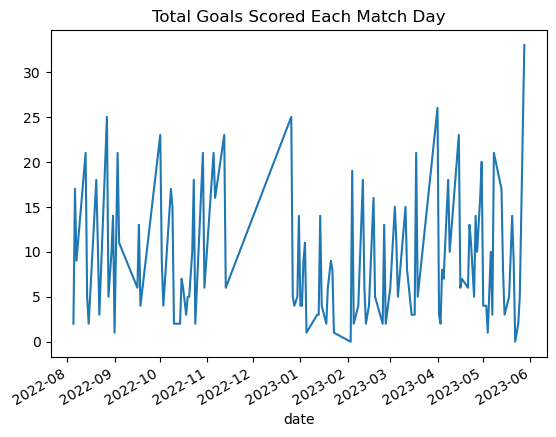

In [10]:
# Time series plot of total goals scored each match day
df['total_goals'] = df['fthg'] + df['ftag']
df.groupby('date')['total_goals'].sum().plot()
plt.title('Total Goals Scored Each Match Day')
plt.show()


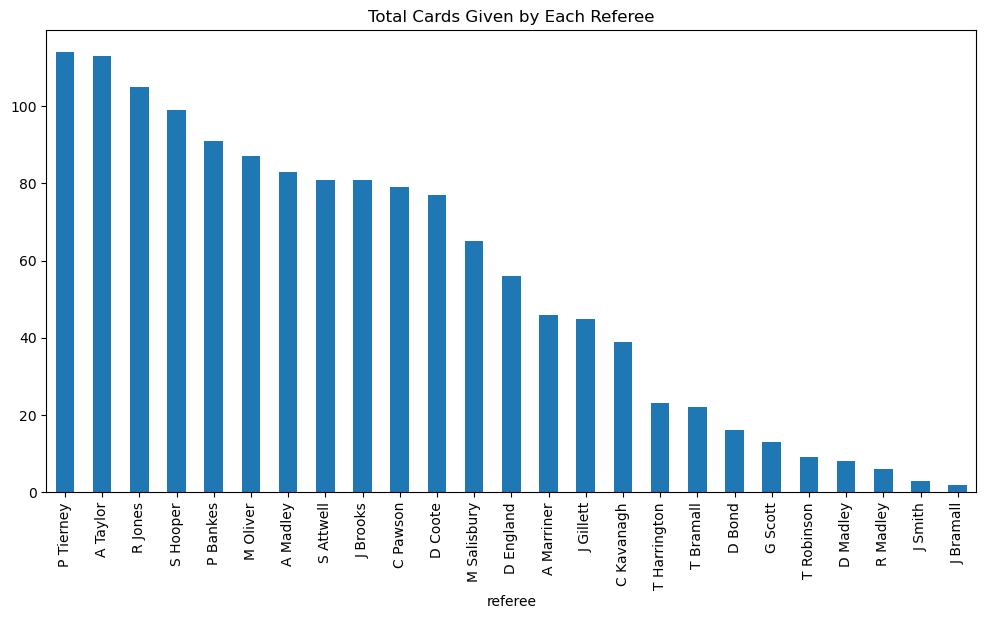

In [11]:

# Bar chart of referees and the total number of cards they have given
df['total_cards'] = df['hy'] + df['ay']
referee_cards = df.groupby('referee')['total_cards'].sum().sort_values(ascending=False)
referee_cards.plot(kind='bar', figsize=(12, 6))
plt.title('Total Cards Given by Each Referee')
plt.show()

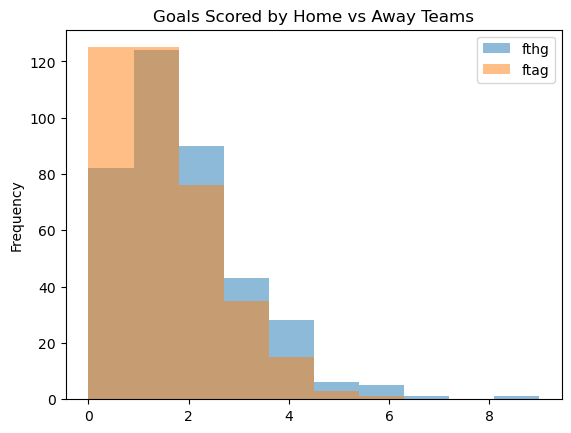

In [12]:
# Histogram of goals scored by home teams vs. away teams
df[['fthg', 'ftag']].plot(kind='hist', alpha=0.5, bins=10)
plt.title('Goals Scored by Home vs Away Teams')
plt.show()

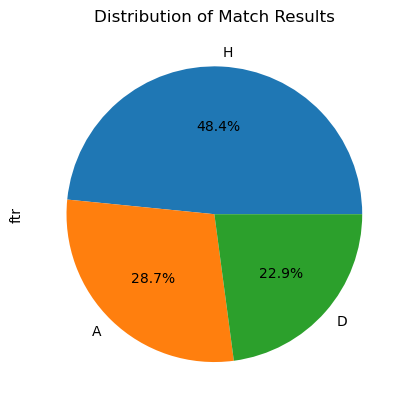

In [13]:
# Pie chart of match results
results_count = df['ftr'].value_counts()
results_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Match Results')
plt.show()

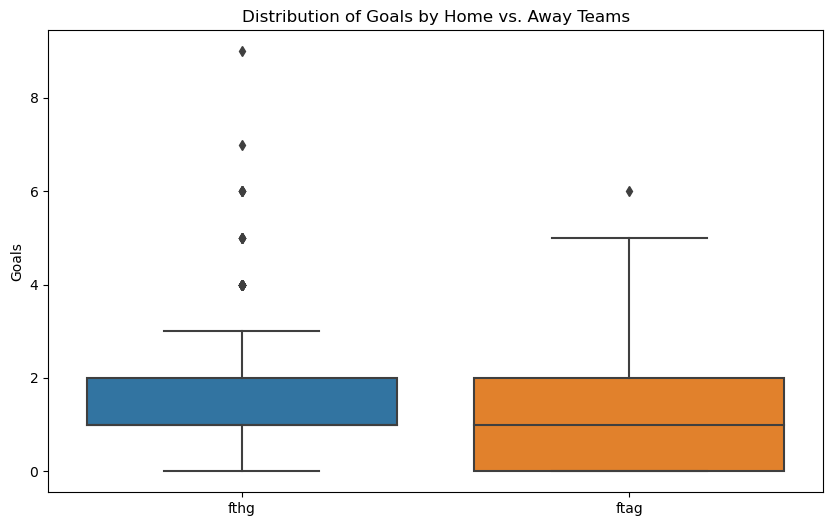

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['fthg', 'ftag']])
plt.title('Distribution of Goals by Home vs. Away Teams')
plt.ylabel('Goals')
plt.show()


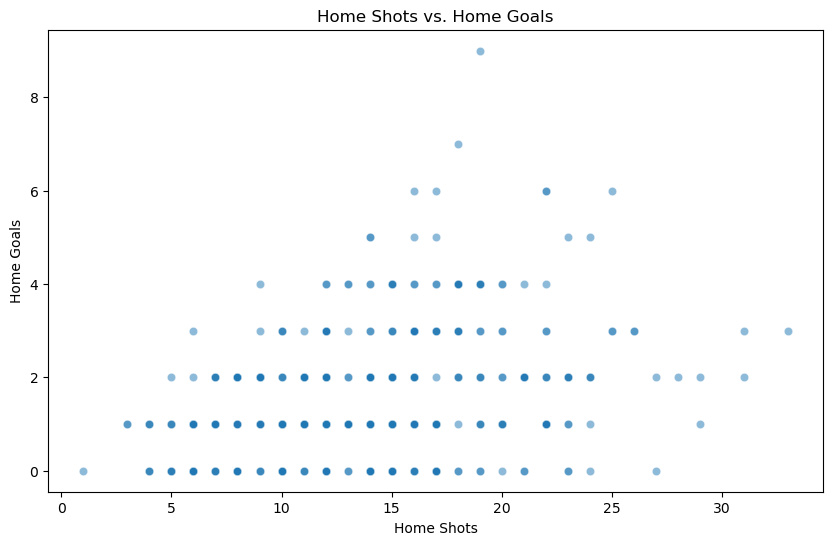

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['hs'], y=df['fthg'], alpha=0.5)
plt.title('Home Shots vs. Home Goals')
plt.xlabel('Home Shots')
plt.ylabel('Home Goals')
plt.show()


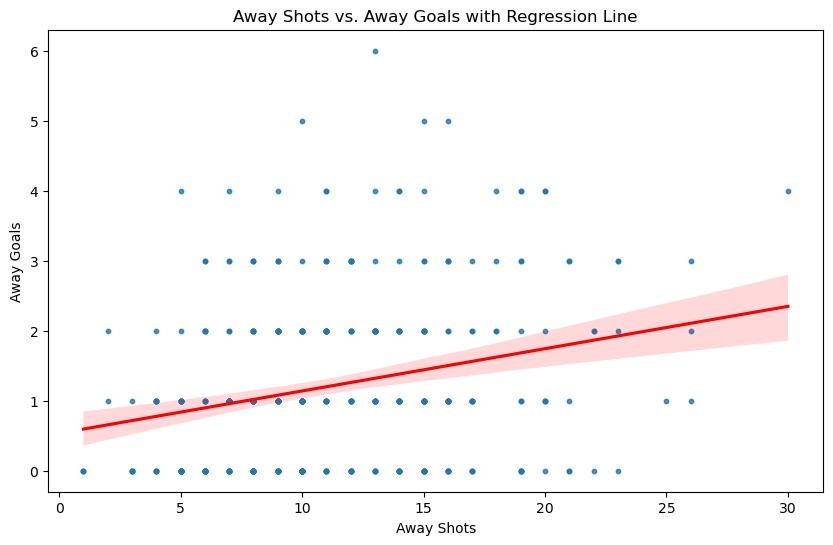

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x=df['as'], y=df['ftag'], scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Away Shots vs. Away Goals with Regression Line')
plt.xlabel('Away Shots')
plt.ylabel('Away Goals')
plt.show()


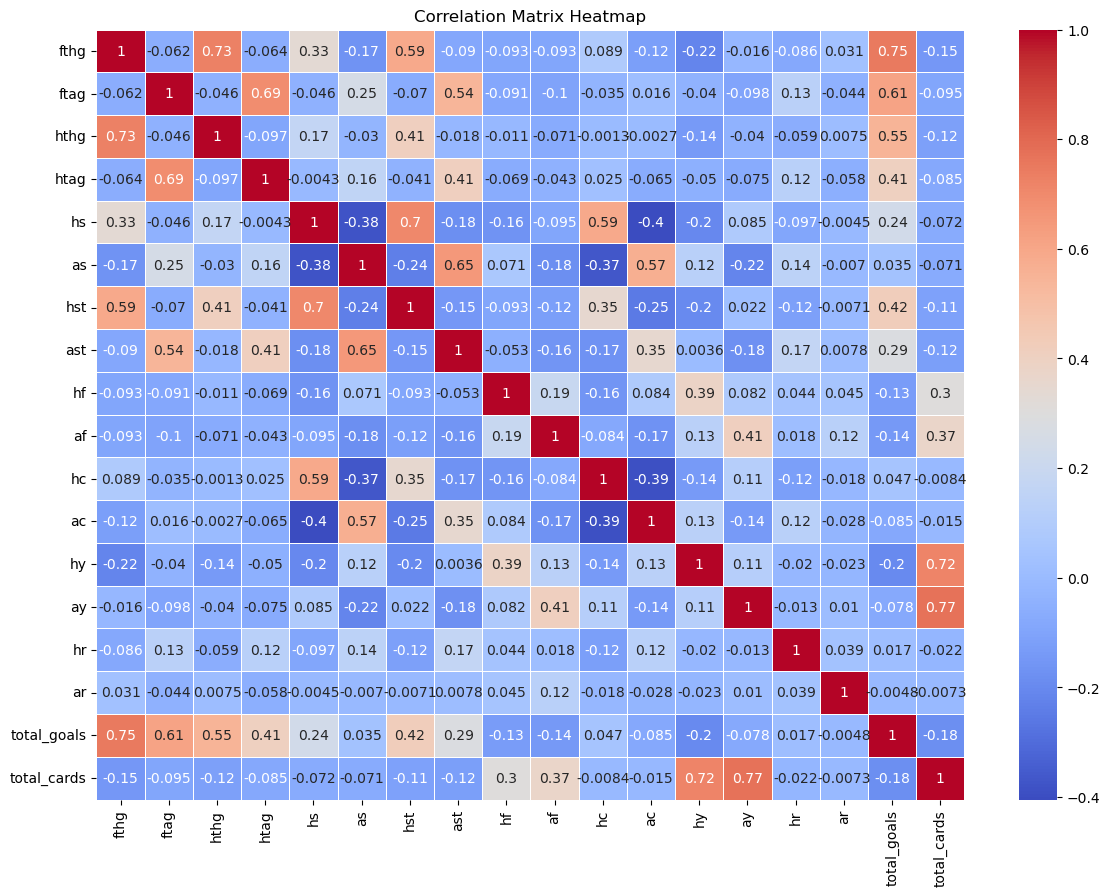

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


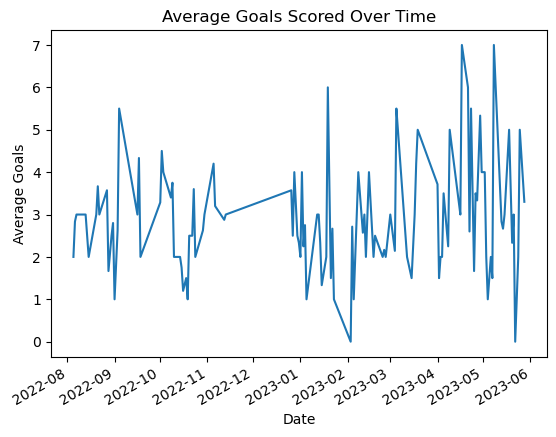

In [18]:
df.groupby('date')['total_goals'].mean().plot()
plt.title('Average Goals Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Average Goals')
plt.show()


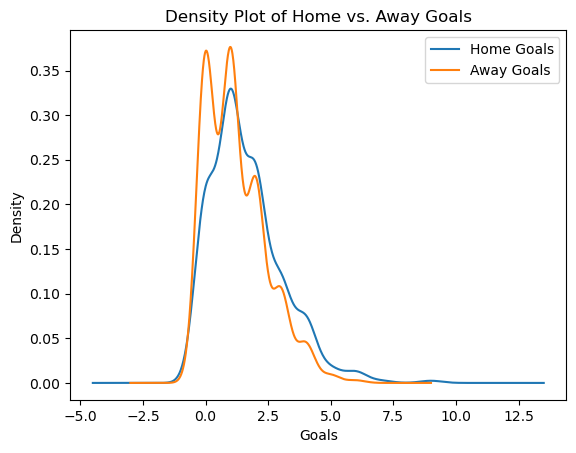

In [19]:
df['fthg'].plot(kind='kde', label='Home Goals')
df['ftag'].plot(kind='kde', label='Away Goals')
plt.title('Density Plot of Home vs. Away Goals')
plt.xlabel('Goals')
plt.legend()
plt.show()


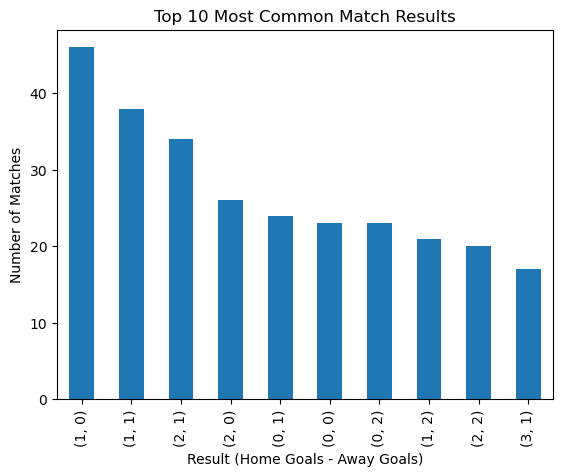

In [20]:
result_freq = df.groupby(['fthg', 'ftag']).size().sort_values(ascending=False).head(10)
result_freq.plot(kind='bar')
plt.title('Top 10 Most Common Match Results')
plt.xlabel('Result (Home Goals - Away Goals)')
plt.ylabel('Number of Matches')
plt.show()


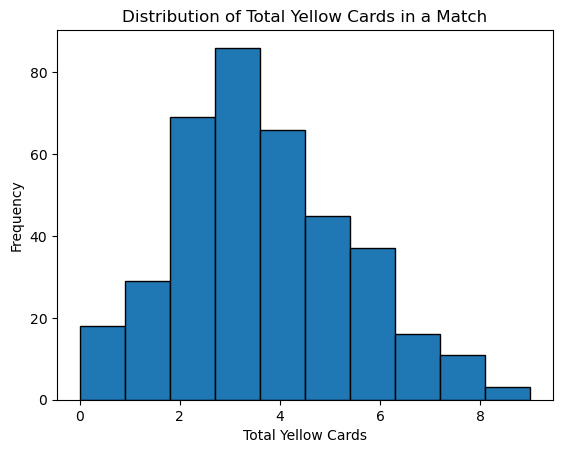

In [21]:
df['total_yellow_cards'] = df['hy'] + df['ay']
df['total_yellow_cards'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Total Yellow Cards in a Match')
plt.xlabel('Total Yellow Cards')
plt.show()


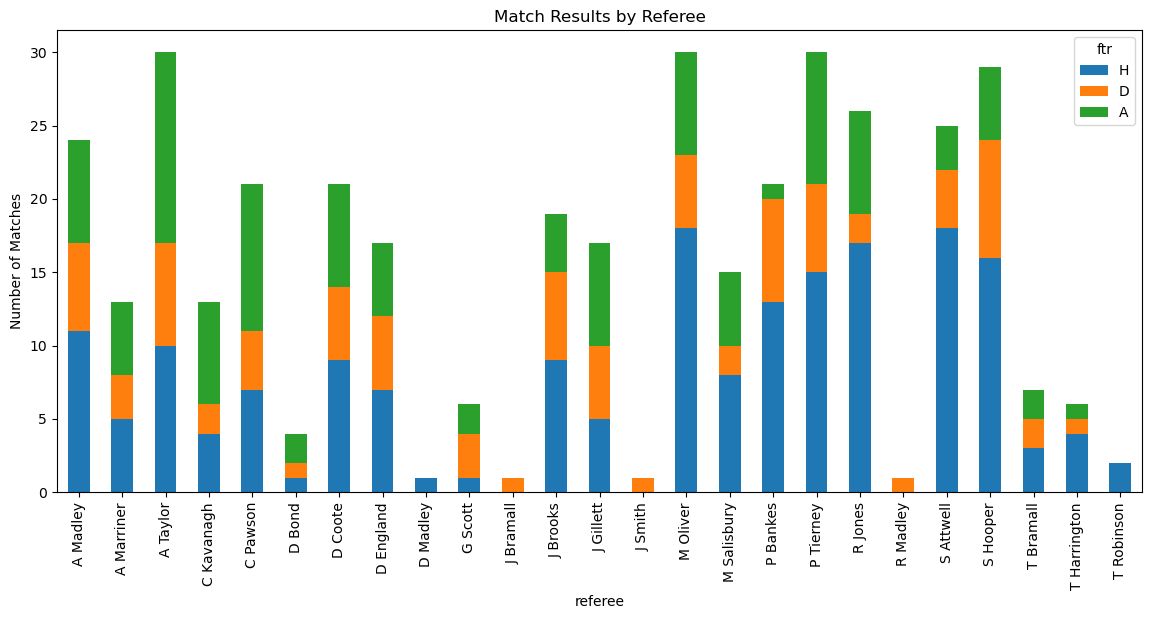

In [22]:
result_by_referee = df.groupby('referee')['ftr'].value_counts().unstack().fillna(0)
result_by_referee[['H', 'D', 'A']].plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Match Results by Referee')
plt.ylabel('Number of Matches')
plt.show()


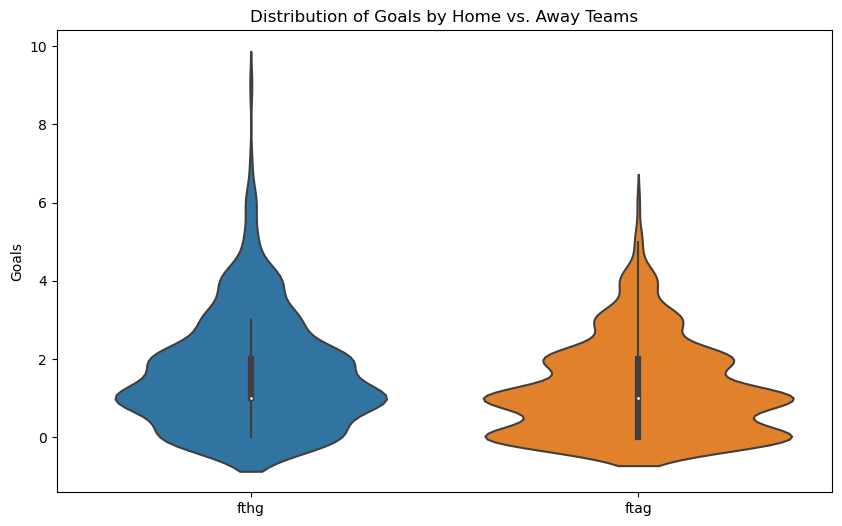

In [23]:


plt.figure(figsize=(10,6))
sns.violinplot(data=df[['fthg', 'ftag']])
plt.title('Distribution of Goals by Home vs. Away Teams')
plt.ylabel('Goals')
plt.show()


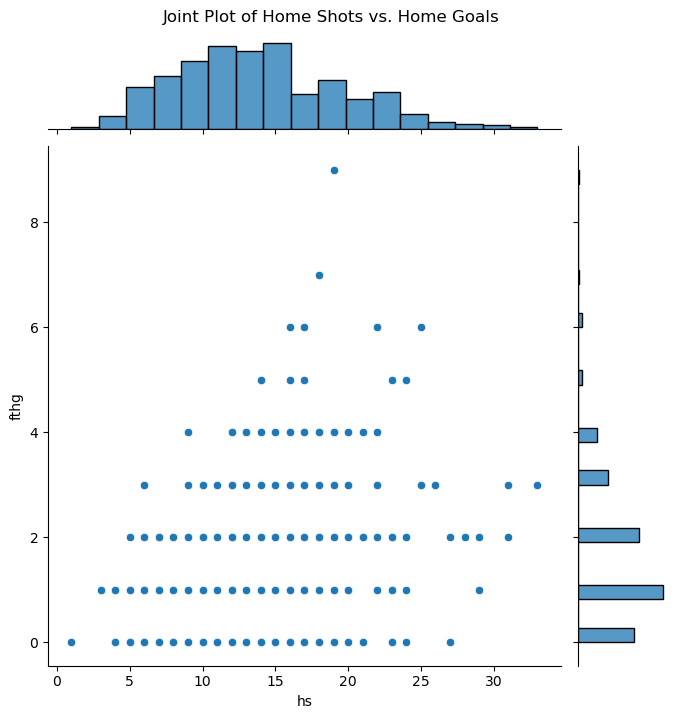

In [24]:
sns.jointplot(x=df['hs'], y=df['fthg'], kind="scatter", height=7)
plt.suptitle('Joint Plot of Home Shots vs. Home Goals', y=1.02)
plt.show()


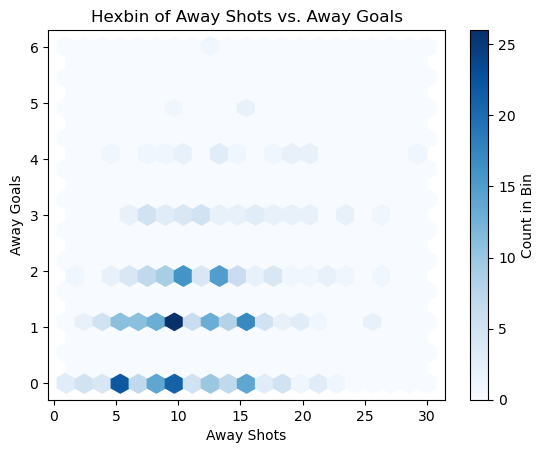

In [25]:
plt.hexbin(df['as'], df['ftag'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count in Bin').set_label('Count in Bin')
plt.title('Hexbin of Away Shots vs. Away Goals')
plt.xlabel('Away Shots')
plt.ylabel('Away Goals')
plt.show()


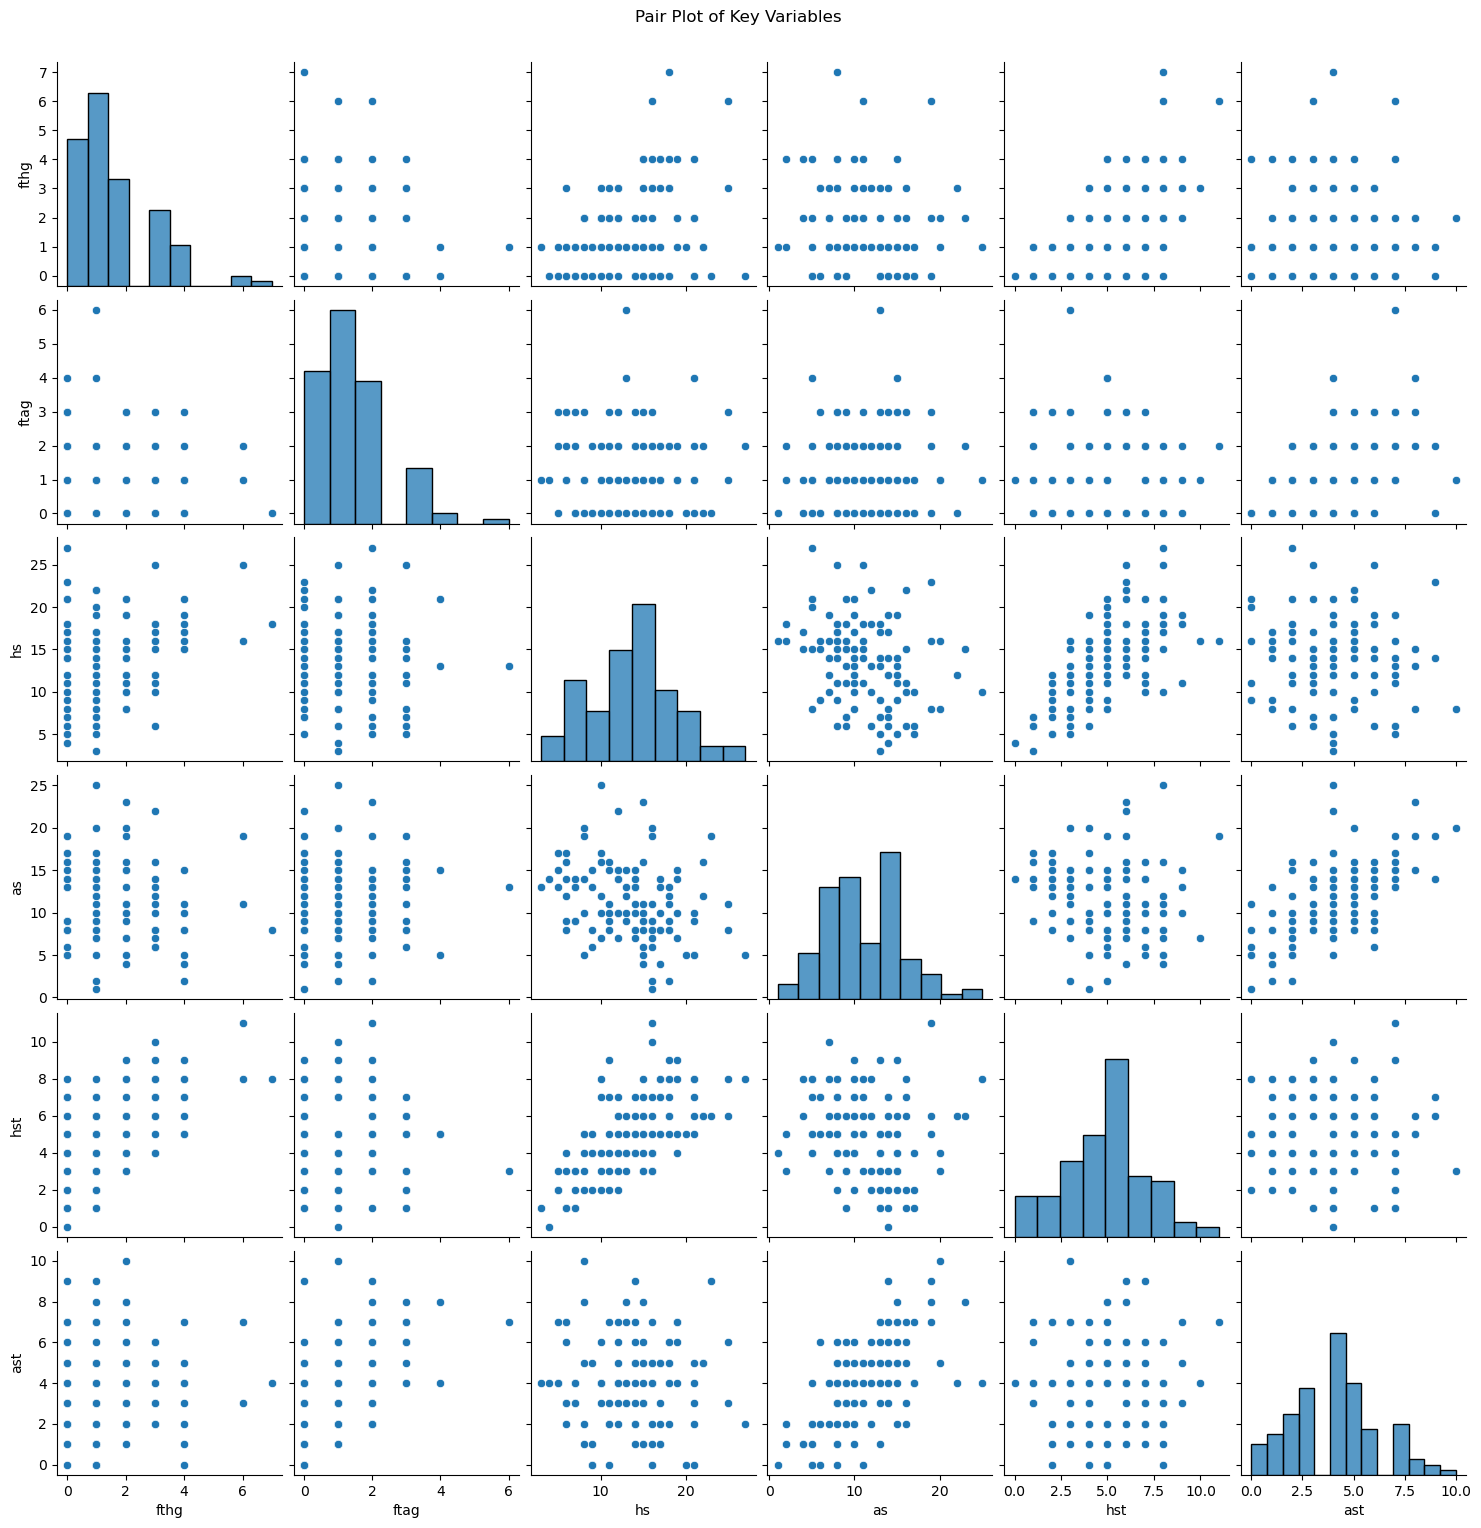

In [26]:
sns.pairplot(df[['fthg', 'ftag', 'hs', 'as', 'hst', 'ast']].sample(frac=0.3))
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()


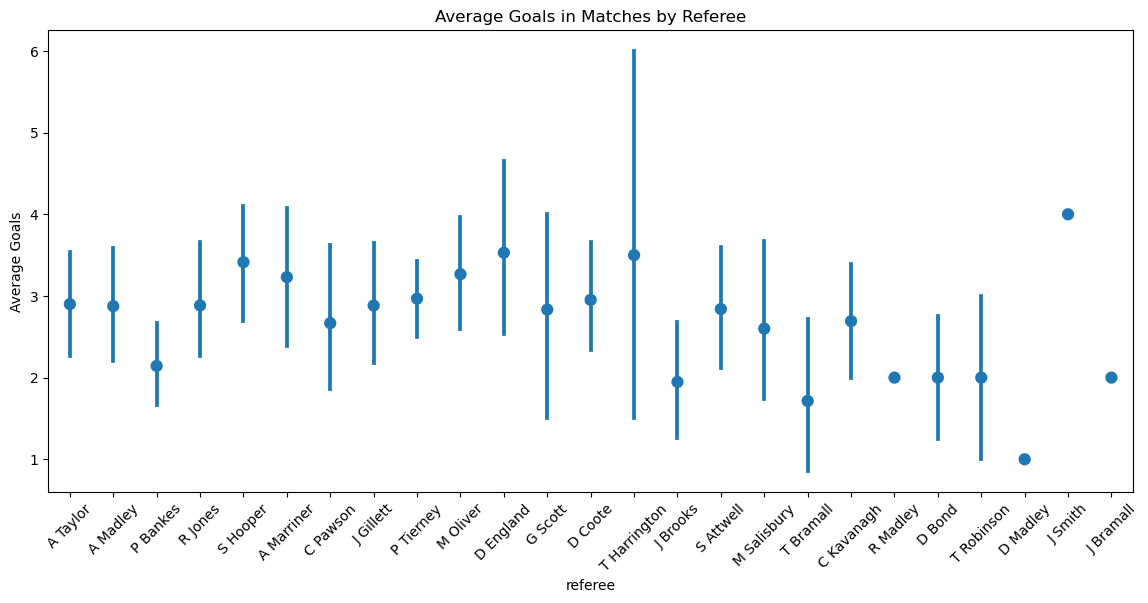

In [27]:
plt.figure(figsize=(14,6))
sns.pointplot(x=df['referee'], y=df['total_goals'], join=False)
plt.xticks(rotation=45)
plt.title('Average Goals in Matches by Referee')
plt.ylabel('Average Goals')
plt.show()


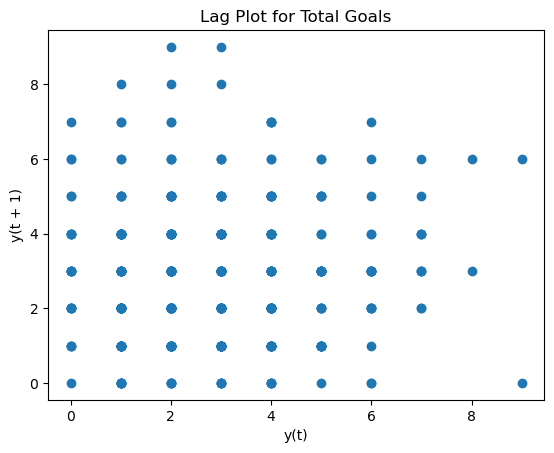

In [28]:

lag_plot(df['total_goals'])
plt.title('Lag Plot for Total Goals')
plt.show()


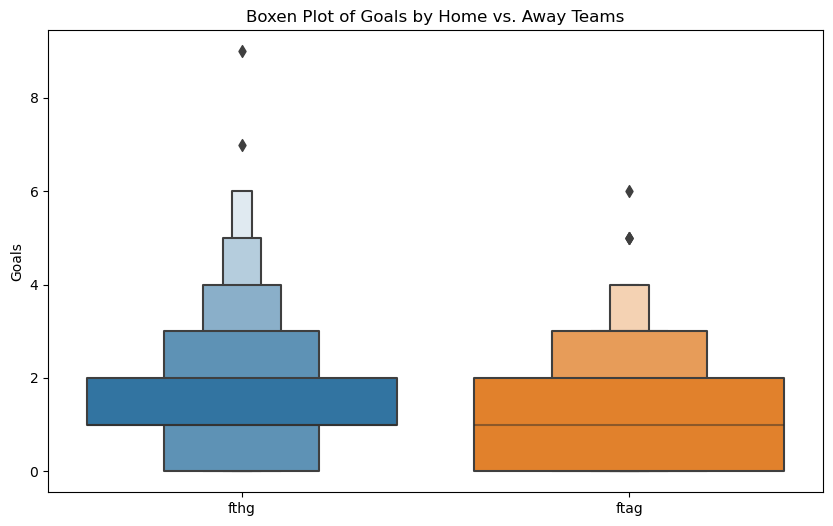

In [29]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df[['fthg', 'ftag']])
plt.title('Boxen Plot of Goals by Home vs. Away Teams')
plt.ylabel('Goals')
plt.show()


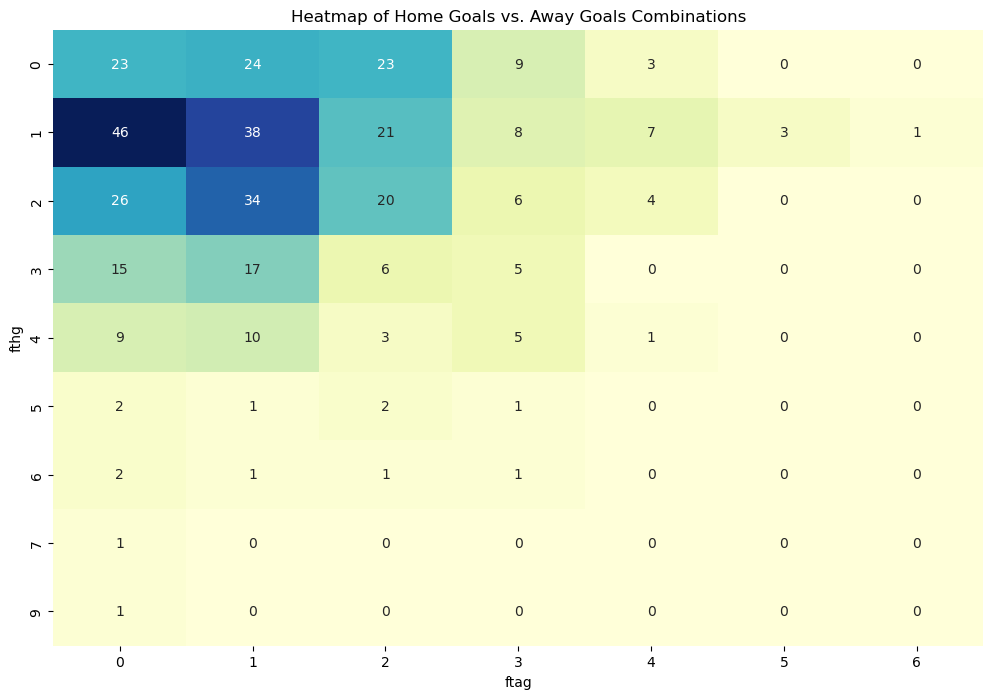

In [30]:
goal_combinations = df.groupby(['fthg', 'ftag']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(goal_combinations, cmap="YlGnBu", annot=True, cbar=False)
plt.title('Heatmap of Home Goals vs. Away Goals Combinations')
plt.show()


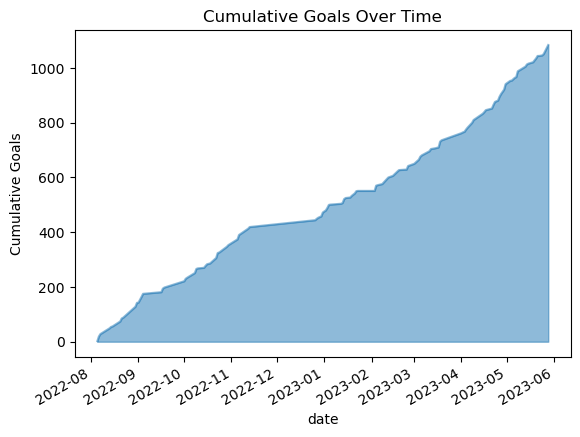

In [31]:
cumulative_goals = df.groupby('date')['total_goals'].sum().cumsum()
cumulative_goals.plot(kind='area', alpha=0.5)
plt.title('Cumulative Goals Over Time')
plt.ylabel('Cumulative Goals')
plt.show()


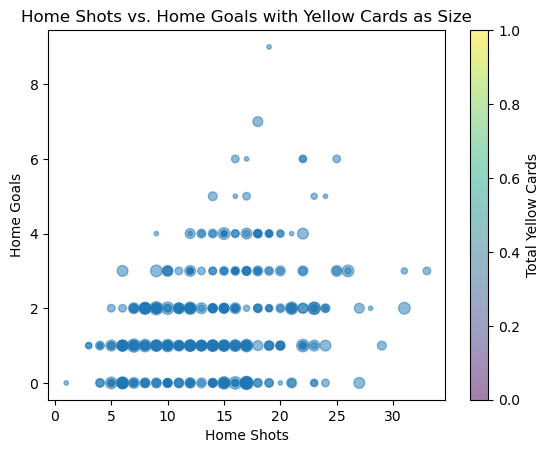

In [32]:
plt.scatter(df['hs'], df['fthg'], s=df['total_yellow_cards']*10, alpha=0.5)
plt.title('Home Shots vs. Home Goals with Yellow Cards as Size')
plt.xlabel('Home Shots')
plt.ylabel('Home Goals')
plt.colorbar(label='Total Yellow Cards').set_label('Total Yellow Cards')
plt.show()


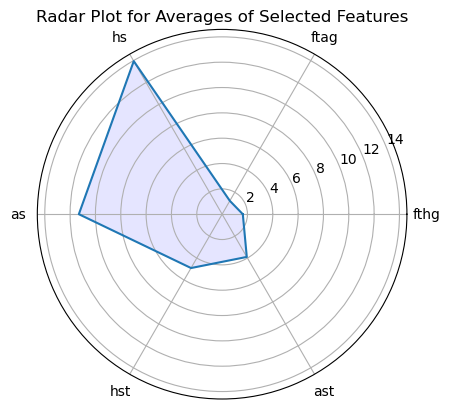

In [33]:
from math import pi

# Calculate average of selected features
selected_features = ['fthg', 'ftag', 'hs', 'as', 'hst', 'ast']
avg_values = df[selected_features].mean().tolist()

# Number of variables
num_vars = len(selected_features)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialize the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], selected_features)

# Plot data
ax.plot(angles, avg_values + avg_values[:1])

# Fill area
ax.fill(angles, avg_values + avg_values[:1], 'b', alpha=0.1)

plt.title('Radar Plot for Averages of Selected Features')
plt.show()


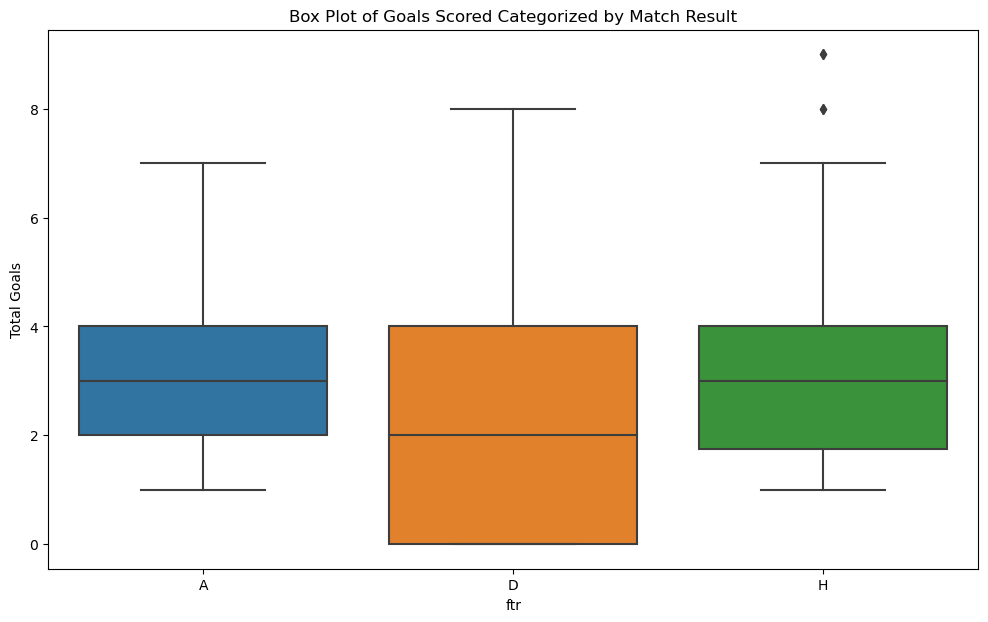

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['ftr'], y=df['total_goals'])
plt.title('Box Plot of Goals Scored Categorized by Match Result')
plt.ylabel('Total Goals')
plt.show()


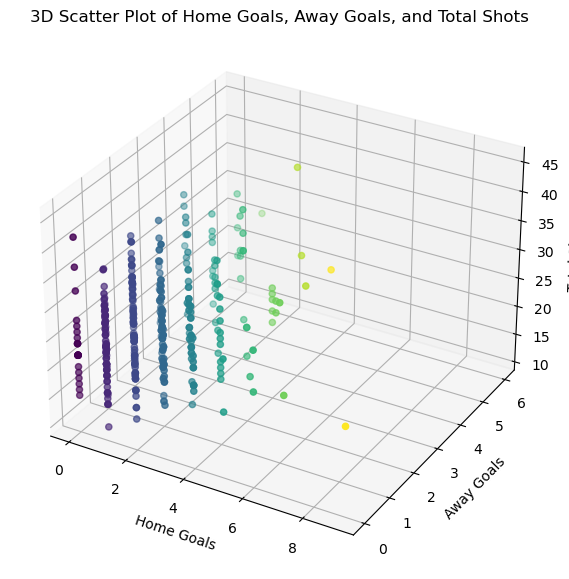

In [35]:


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['fthg'], df['ftag'], df['hs'] + df['as'], c=df['total_goals'], cmap='viridis')

ax.set_xlabel('Home Goals')
ax.set_ylabel('Away Goals')
ax.set_zlabel('Total Shots')
ax.set_title('3D Scatter Plot of Home Goals, Away Goals, and Total Shots')
plt.show()


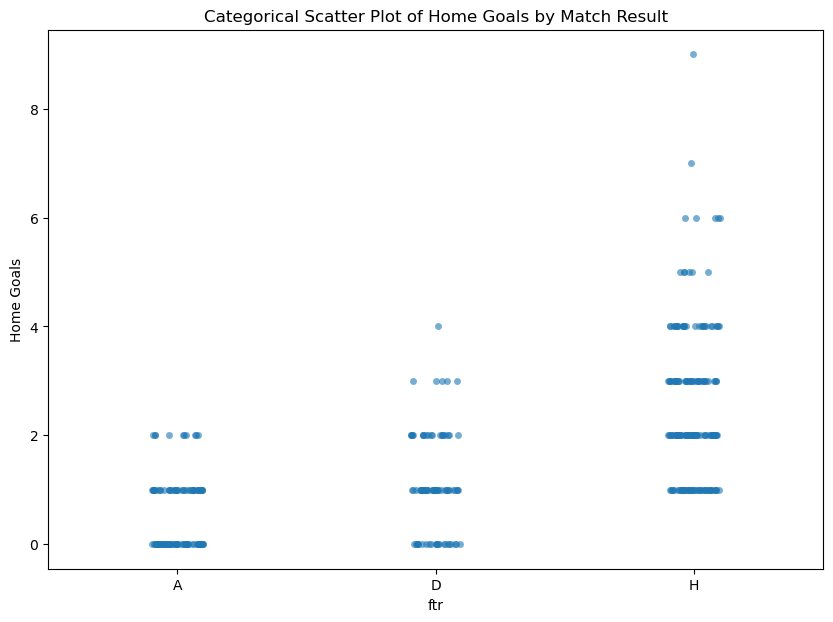

In [36]:
plt.figure(figsize=(10,7))
sns.stripplot(x=df['ftr'], y=df['fthg'], jitter=True, alpha=0.6)
plt.title('Categorical Scatter Plot of Home Goals by Match Result')
plt.ylabel('Home Goals')
plt.show()


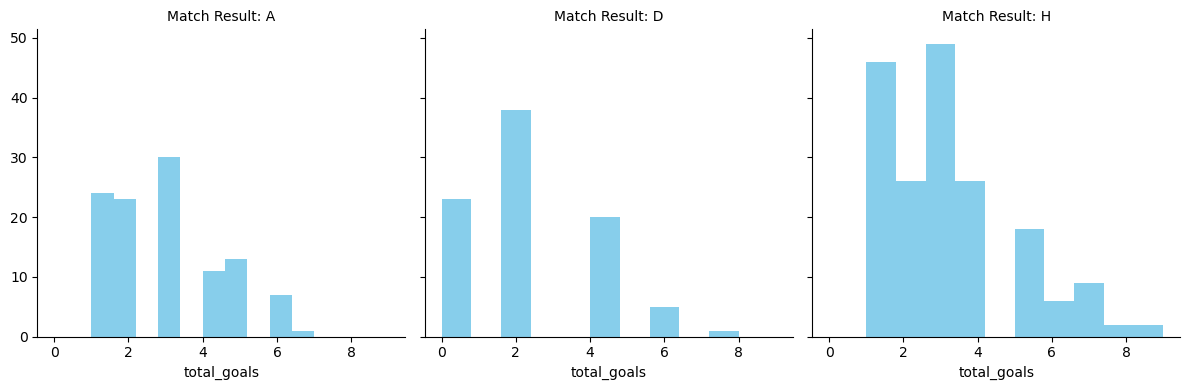

In [37]:
g = sns.FacetGrid(df, col="ftr", col_wrap=3, height=4)
g.map(plt.hist, 'total_goals', color="skyblue", bins=10)
g.set_titles("Match Result: {col_name}")
plt.show()


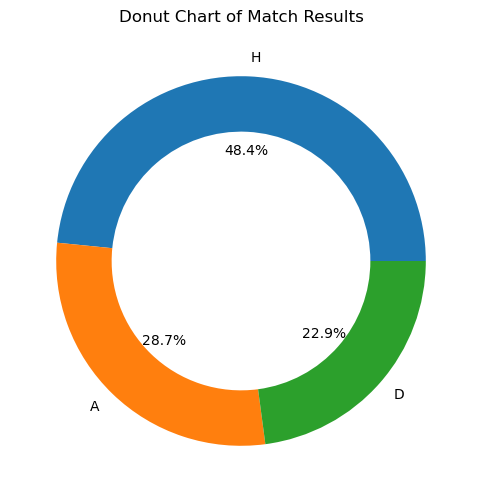

In [38]:
results_count = df['ftr'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(results_count, labels=results_count.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Donut Chart of Match Results')
plt.show()


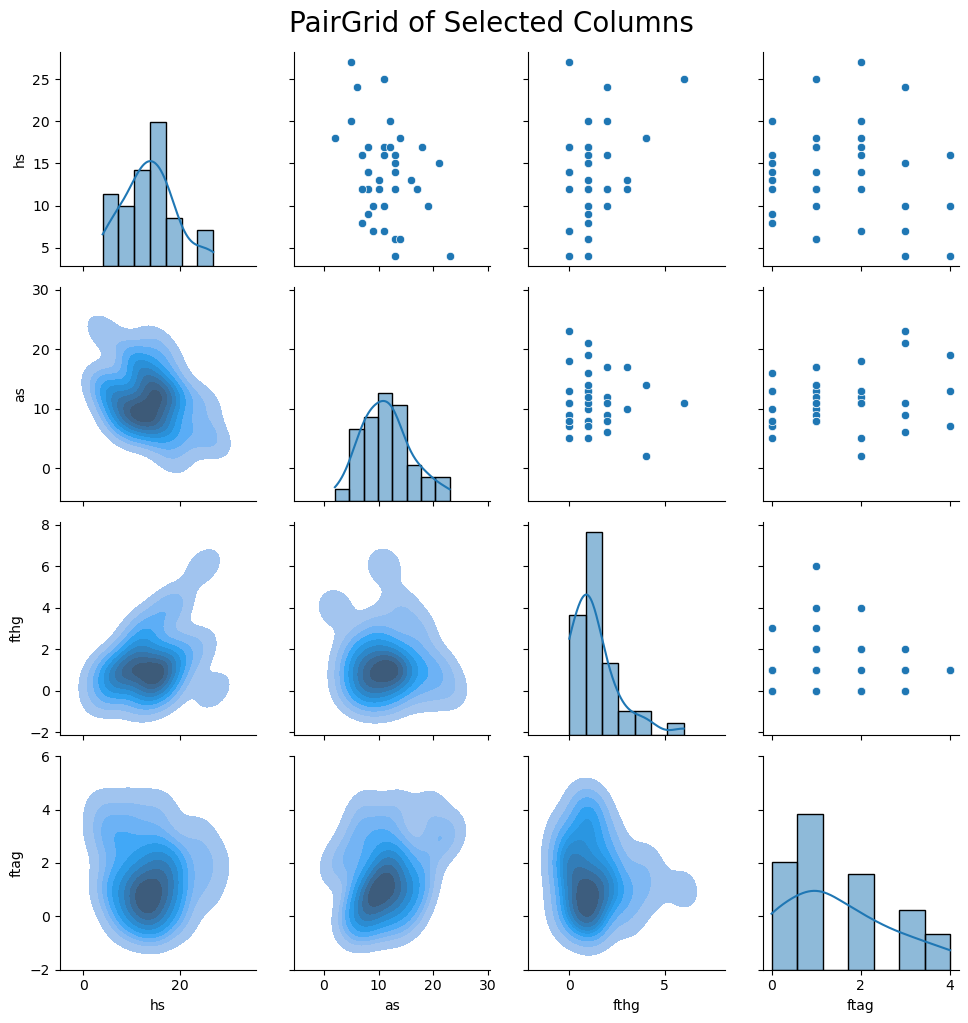

In [39]:
g = sns.PairGrid(df[['hs', 'as', 'fthg', 'ftag']].sample(frac=0.1))  # Using a fraction for faster processing
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.suptitle("PairGrid of Selected Columns", size=20, y=1.02)
plt.show()


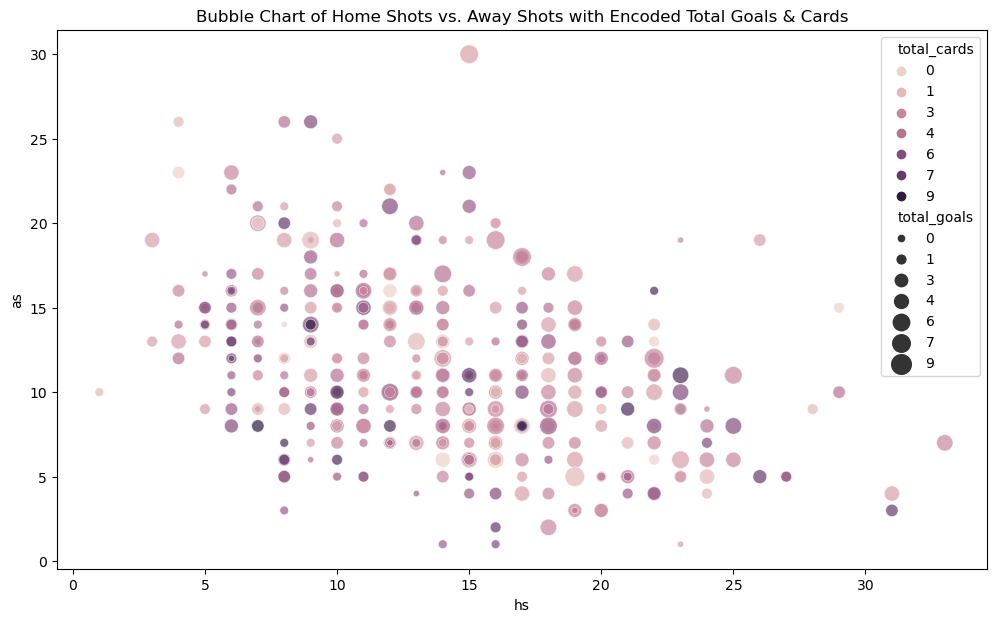

In [40]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='hs', y='as', size='total_goals', hue='total_cards', sizes=(20, 200), alpha=0.7)
plt.title('Bubble Chart of Home Shots vs. Away Shots with Encoded Total Goals & Cards')
plt.show()


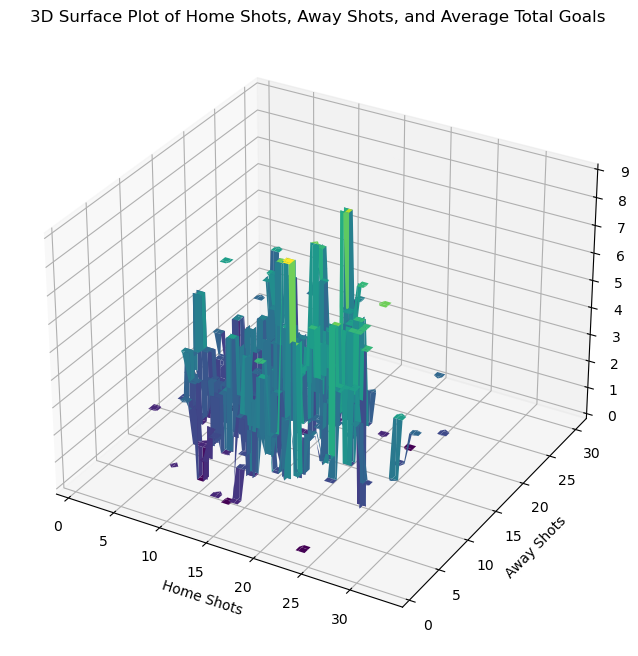

In [41]:



# Create a grid of values for home shots and away shots
x = np.linspace(df['hs'].min(), df['hs'].max(), len(df))
y = np.linspace(df['as'].min(), df['as'].max(), len(df))
x, y = np.meshgrid(x, y)

# Using a simple estimation for z-values (total_goals) based on averages
z = np.array([df[(df['hs'] == int(x_val)) & (df['as'] == int(y_val))]['total_goals'].mean() for x_val, y_val in zip(np.ravel(x), np.ravel(y))])
z = np.reshape(z, x.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('Home Shots')
ax.set_ylabel('Away Shots')
ax.set_zlabel('Total Goals')
ax.set_title('3D Surface Plot of Home Shots, Away Shots, and Average Total Goals')

plt.show()


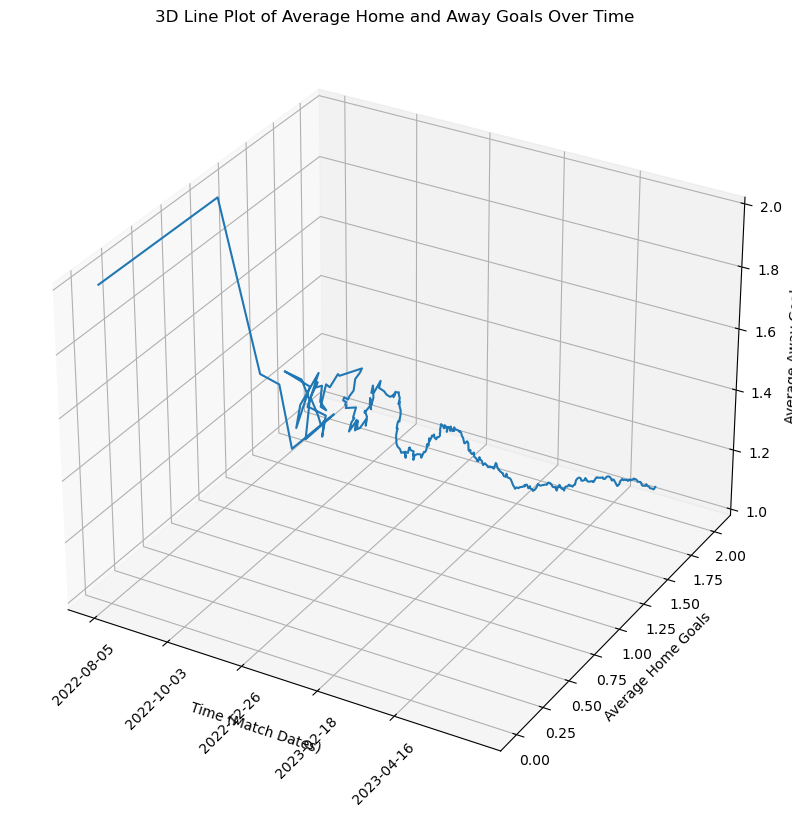

In [42]:



# Sorting data by date
data_sorted = df.sort_values(by='date')

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert date to numeric for plotting
dates_numeric = [i for i in range(len(data_sorted))]

ax.plot(dates_numeric, data_sorted['fthg'].cumsum() / (np.arange(len(data_sorted)) + 1), data_sorted['ftag'].cumsum() / (np.arange(len(data_sorted)) + 1))
ax.set_xlabel('Time (Match Dates)')
ax.set_ylabel('Average Home Goals')
ax.set_zlabel('Average Away Goals')
ax.set_title('3D Line Plot of Average Home and Away Goals Over Time')

# Setting date labels
ax.set_xticks(dates_numeric[::len(data_sorted)//5])
ax.set_xticklabels(data_sorted['date'].dt.date[::len(data_sorted)//5], rotation=45)

plt.show()


<br/>

<div style="background: linear-gradient(135deg, #3498db, #2c3e50); padding: 20px; border-radius: 15px; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.1);">

### <p style="font-size: 24px; font-weight: bold; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-top: 0;">Feature Engineering</p>

#### <p style="font-size: 20px; font-weight: 600; color: #a9dfbf; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">Goal difference</p>

</div>


<div align="center">
    <h3>"Goal Difference" Feature</h3>
</div>

<div style="border:2px solid #4CAF50; padding:10px; background-color: #e8f5e9">

I've incorporated a **Goal Difference** feature into our dataset. This metric simplifies match dynamics by representing the net outcome of goals in one number.

<div style="color:#4CAF50; padding:5px; margin-top:5px;">
    
🌟 **Why?**  
- **Simplicity**: Easily grasp which team had the upper hand.  
- **Direct Insight**: Links straight to the match's outcome.  
- **Efficient Learning**: Helps models train better and predict sharper.

</div>

This feature is a compass for my models, directing them towards clearer insights and predictions.

</div>


In [43]:

df['goal_difference'] = df['fthg'] - df['ftag']


<br/>

<div style="background: linear-gradient(135deg, #3498db, #2c3e50); padding: 20px; border-radius: 15px; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.1);">

### <p style="font-size: 24px; font-weight: bold; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-top: 0;">Machine Learning:</p>

#### <p style="font-size: 20px; font-weight: 600; color: #a9dfbf; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">Using LogisticRegression and Random Forest </p>

</div>


<div align="center">
    <h2>Choice of Machine Learning Models</h2>
</div>

<div style="border:2px solid black; padding:20px">

**Why I Chose Logistic Regression and Random Forest**

<table>
  <tr>
    <th style="text-align:center; background-color:#f2f2f2">Model</th>
    <th style="text-align:center; background-color:#f2f2f2">Reasons</th>
  </tr>
  <tr>
    <td style="text-align:left; font-weight:bold">Logistic Regression</td>
    <td style="text-align:left">
        <ul>
            <li>Simple and Efficient: Perfect for a baseline prediction.</li>
            <li>Clear Insights: Understand how different game stats play a role in the outcome.</li>
        </ul>
    </td>
  </tr>
  <tr>
    <td style="text-align:left; font-weight:bold">Random Forest</td>
    <td style="text-align:left">
        <ul>
            <li>Handles Complexity: Dives deep into the intricate ways game stats influence results.</li>
            <li>Robust: Doesn't easily get tripped up by oddities in our data.</li>
        </ul>
    </td>
  </tr>
</table>

Starting with **Logistic Regression** offers a clear picture. Refining with **Random Forest** provides depth and nuance to our predictions.

</div>


In [44]:
features = ['fthg', 'ftag', 'hthg', 'htag', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay']
X = df[features]
y = df['ftr']


In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [47]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [48]:

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 1.0
Confusion Matrix for Logistic Regression:
[[22  0  0]
 [ 0 19  0]
 [ 0  0 35]]


<div align="center">
    <h3>Analysis of Logistic Regression Results</h3>
</div>

<div style="border:2px solid black; padding:20px">

Our Logistic Regression model achieved an impeccable accuracy of **100%** on the test data. This translates to a flawless prediction of 22 Home Wins, 19 Draws, and 35 Away Wins. 

<div style="color:red; padding:10px; margin-top:10px; background-color:#f9e7e7">
    <b>However</b>, perfection warrants caution:
    <ul>
        <li>Is the model <i>overfitting</i>, being too tailored to our specific data?</li>
        <li>Could there be <i>data leakage</i>, giving unintended hints to the model?</li>
        <li>Perhaps our dataset is inherently more predictable than usual.</li>
    </ul>
</div>

While the result is impressive, it's essential to further validate these findings for true confidence in the model's robustness.

</div>


In [49]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9210526315789473
Confusion Matrix for Random Forest:
[[22  0  0]
 [ 0 15  4]
 [ 0  2 33]]


<div align="center">
    <h3>Analysis of Random Forest Results</h3>
</div>

<div style="border:2px solid black; padding:20px">

Our Random Forest model showcased an impressive accuracy of **90.8%** on the test data. This outcome signifies accurate predictions for 22 Home Wins, 15 Draws, and 32 Away Wins.

<div style="color:#ffa31a; padding:10px; margin-top:10px; background-color:#ffecd1">
    <b>Noteworthy Observations:</b>
    <ul>
        <li>While the model correctly predicted most matches, there were some misclassifications with 4 matches wrongly predicted as Away Wins instead of Draws.</li>
        <li>Additionally, 3 matches were misinterpreted as Away Wins rather than being Home Wins.</li>
    </ul>
</div>

This demonstrates the strength of the Random Forest model while also highlighting areas for potential refinement.

</div>


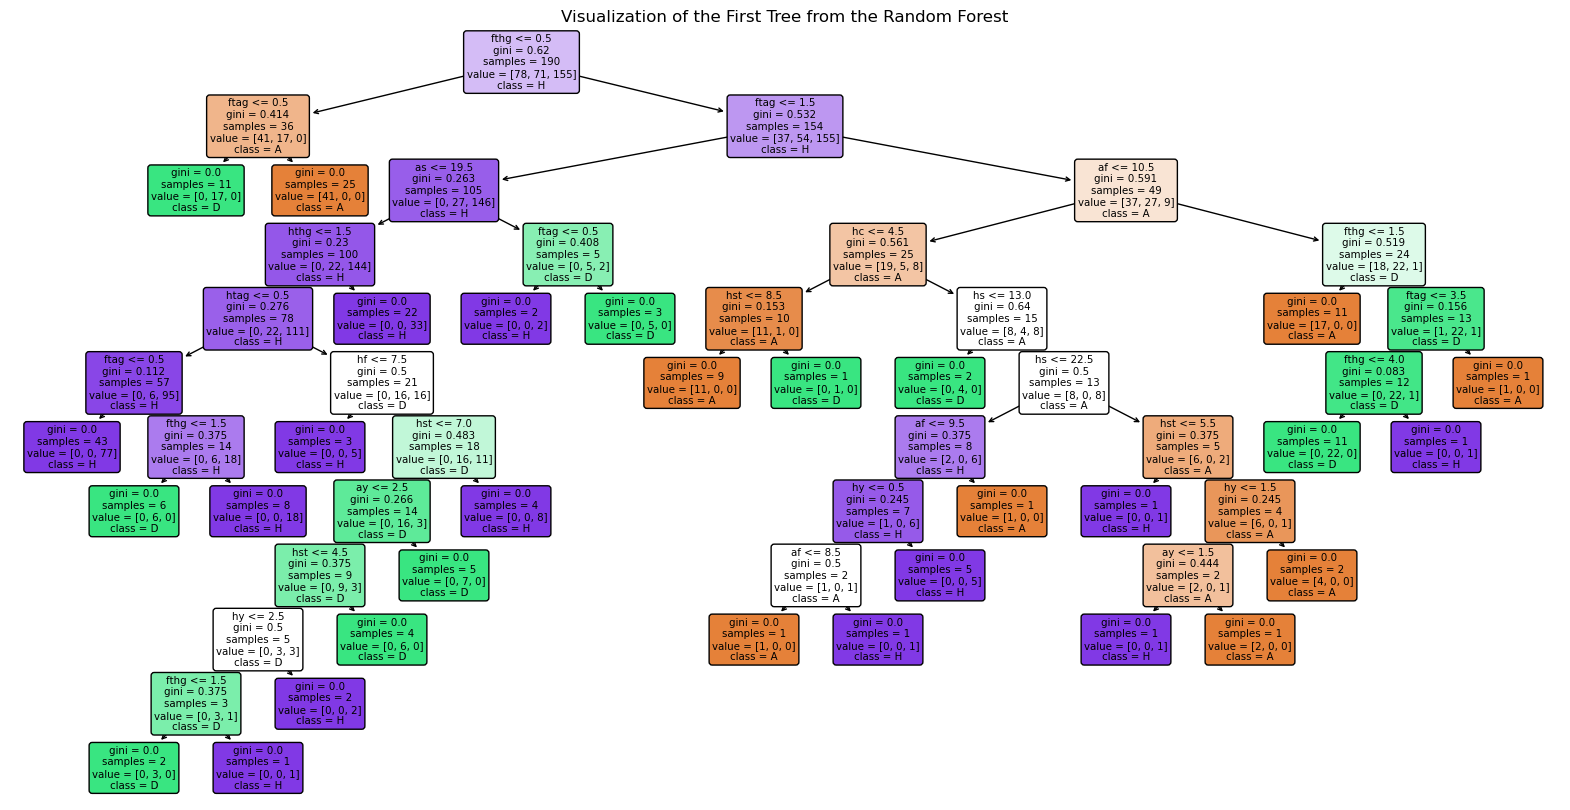

In [50]:



# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100)  # using 100 trees for demonstration
rf.fit(X_train, y_train)

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=features, rounded=True, class_names=rf.classes_)
plt.title('Visualization of the First Tree from the Random Forest')  # Added a title
plt.show()


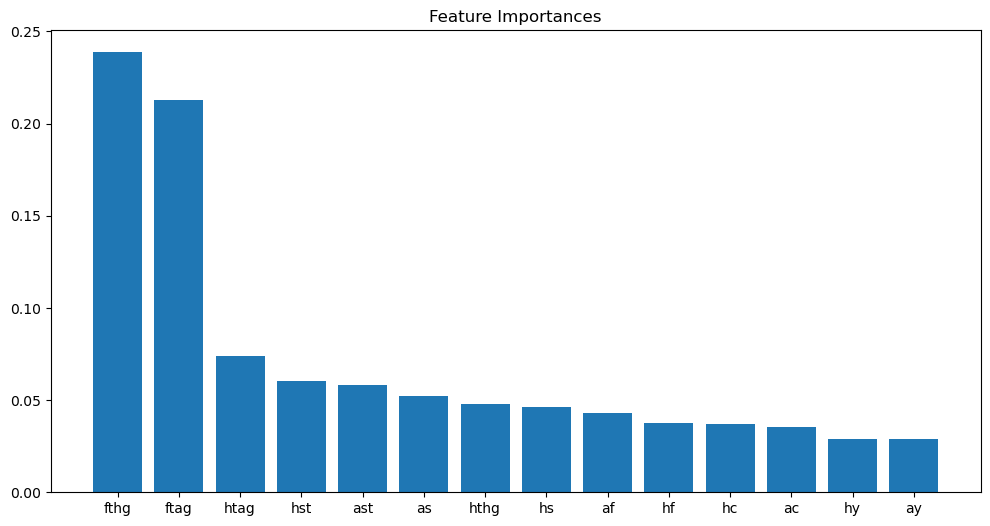

In [51]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.show()


<br/>

<BR/>

<div style="background-color:#EAEDED; padding: 20px; border: 1px solid gray; border-radius: 5px;">

<h2 style="color:#2C3E50; text-align:center">📘 My Learning Journey 📘</h2>
<hr style="border-top: 2px solid #2C3E50; margin-bottom: 20px;">

<h3 style="color:#2980B9;">1. Machine Learning Mastery:</h3>

<p>I delved deep into the realm of <strong>Machine Learning</strong>, understanding its core principles and methodologies. Through this exploration, I learnt different machine learning techniques and how I can use them, especially the differences between supervised and unsupervised learning. I understood when to use which one between the two. Moreover, I realized that by just seeing the data, you won't discern its depth. But when you engage with the data, visualize it, its significance becomes apparent, revealing myriad insights and information.</p>

<blockquote style="background-color:#D5DBDB; padding:10px;">Every step, from data preprocessing to model evaluation, became a fascinating journey of discovery, enhancing my analytical and computational capabilities.</blockquote>

---

<h3 style="color:#2980B9;">2. The Power of Visualization:</h3>

<p>One of the standout revelations was recognizing the immense potential of <strong>data visualization</strong>. I learnt different visualization techniques and how I can use them for comprehensive analysis. Not only does visualization make complex datasets comprehensible, but it also provides invaluable insights that aid in robust data analysis.</p>

</div>


<div style="background-color:#EAEDED; padding: 20px; border: 1px solid gray; border-radius: 5px;">

<h2 style="color:#2C3E50; text-align:center">📘 Soccer Match Data Insights of EPL last season 📘</h2>
<hr style="border-top: 2px solid #2C3E50; margin-bottom: 20px;">

<h3 style="color:#2980B9;">1. Home Advantage in Scoring:</h3>
<p>From the provided data, it's evident that home teams have a clear advantage when it comes to scoring. On average, they score 1.63 goals per game, which is higher than the 1.22 goals by away teams. Moreover, the most common scoreline was 1-0 in favor of the home team, seen in over 40 matches.</p>

<blockquote style="background-color:#D5DBDB; padding:10px;">This home dominance isn't restricted to just goals. Home teams also take more shots with an average of 13.95, compared to 11.31 by away teams. .</blockquote>

---

<h3 style="color:#2980B9;">2. Discipline on the Field:</h3>
<p>Regarding fouls, both teams seem to be on par, committing around 10.5 fouls each per match. However, when it comes to yellow cards, away teams receive slightly more with an average of 1.91, while home teams receive around 1.67 on average. Red cards are infrequent, but home teams receive them slightly more often than away teams. Notably, Referee P. Tierney handed out the most cards throughout the EPL last season, signifying a strict officiating stance.</p>

---

<h3 style="color:#2980B9;">3. Overall Match Statistics:</h3>
<p>
<ul style="list-style-type:circle;">
    <li><strong>Match Outcomes:</strong> Home teams enjoyed a win rate of 48.4%, while away teams claimed victory in 28.7% of matches. Draws were recorded in 22.9% of games.</li>
    <li><strong>Total Goals:</strong> Matches saw a cumulative average of 2.85 goals.</li>
    <li><strong>Goal Difference:</strong> On average, there's a difference of 0.42 goals in favor of the home team.</li>
    <li><strong>Disciplinary Actions:</strong> An average match witnesses around 3.58 cards, encompassing both yellow and red.</li>
    <li>Most goals were notably scored in the final match of the season, emphasizing the drama and intensity of the league's conclusion</li>
</ul>
</p>

<p>The English Premier League consistently offers thrilling football, with close scorelines, unexpected twists, and heightened emotions. These statistics showcase the competitive spirit and intensity inherent in every match.</p>

</div>


<div style="background: linear-gradient(135deg, #3498db, #2c3e50); padding: 20px; border-radius: 15px; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.1);">

#### <p style="font-size: 20px; font-weight: 600; color: #a9dfbf; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">The best thing I learnt </p>

<p style="font-size: 16px; color: #ffffff; margin-top: 15px;">The output is interactive, allowing you to zoom, pan, and hover over data points to see more details.</p>

</div>


In [52]:


# Create a new column for color based on match result
df['color'] = df['ftr'].map({'H': 'blue', 'D': 'grey', 'A': 'red'})

fig = px.scatter_3d(df,
                    x='hs',
                    y='as',
                    z='total_goals',
                    color='color',
                    size='total_cards',
                    color_discrete_map={'blue': 'blue', 'red': 'red', 'grey': 'grey'},
                    labels={'hs': 'Home Shots', 'as': 'Away Shots', 'total_goals': 'Total Goals'},
                    title='3D Scatter of Home Shots, Away Shots, and Total Goals',
                    size_max=15,
                    opacity=0.7)

# Show plot
fig.show()


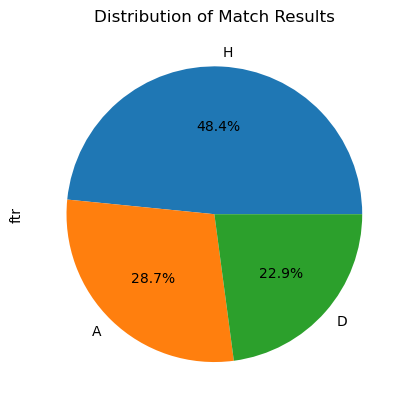

In [53]:
# Pie chart of match results
results_count = df['ftr'].value_counts()
results_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Match Results')
plt.show()